In [216]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
import seaborn

In [217]:
%matplotlib inline

## Ground Cricket Chirps

In _The Song of Insects_ (1948) by George W. Pierce, Pierce mechanically measured the frequency (the number of wing vibrations per second) of chirps (or pulses of sound) made by a striped ground cricket, at various ground temperatures.  Since crickets are ectotherms (cold-blooded), the rate of their physiological processes and their overall metabolism are influenced by temperature.  Consequently, there is reason to believe that temperature would have a profound effect on aspects of their behavior, such as chirp frequency.

In general, it was found that crickets did not sing at temperatures colder than 60º F. or warmer than 100º F.

In [218]:
ground_cricket_data = {"Chirps_Second": [20.0, 16.0, 19.8, 18.4, 17.1, 15.5, 14.7,
                                         15.7, 15.4, 16.3, 15.0, 17.2, 16.0, 17.0,
                                         14.4],
                       "Ground_Temperature": [88.6, 71.6, 93.3, 84.3, 80.6, 75.2, 69.7,
                                              71.6, 69.4, 83.3, 79.6, 82.6, 80.6, 83.5,
                                              76.3]}
df1 = pd.DataFrame(ground_cricket_data)

In [219]:
df1.Chirps_Second

0     20.0
1     16.0
2     19.8
3     18.4
4     17.1
5     15.5
6     14.7
7     15.7
8     15.4
9     16.3
10    15.0
11    17.2
12    16.0
13    17.0
14    14.4
Name: Chirps_Second, dtype: float64

In [220]:
df1.Ground_Temperature

0     88.6
1     71.6
2     93.3
3     84.3
4     80.6
5     75.2
6     69.7
7     71.6
8     69.4
9     83.3
10    79.6
11    82.6
12    80.6
13    83.5
14    76.3
Name: Ground_Temperature, dtype: float64

In [221]:
regression = linear_model.LinearRegression()#Fit to put data in, predict to calculate
regression.fit(df1.Chirps_Second.reshape(-1, 1), df1.Ground_Temperature)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [222]:
regression.predict(18)

array([ 84.2347963])

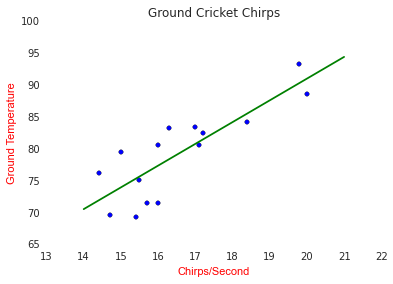

In [225]:
fn = lambda x: regression.predict(x)[0]     #<---Pay Attention!
plt.scatter(df1.Chirps_Second, df1.Ground_Temperature)
xmin, xmax = plt.xlim()
plt.xlabel('Chirps/Second',color='Red')
plt.ylabel('Ground Temperature',color="Red")
plt.title('Ground Cricket Chirps')
xs = np.linspace(xmin, xmax, 100)
plt.plot(xs, [fn(x) for x in xs],color="Green")

In [233]:
r2 = regression.score(df1.Chirps_Second.reshape(-1,1),df1.Ground_Temperature)
print("The R2 is {}".format(r2))

predict1 = int(regression.predict(95))
print("If it was 95 degrees we could estimate that the birds would chirp {} per second..YIKES!".format(predict1))


predict2 = int(regression.predict(18))
print("If there were 18 chirps a second we could estimate that it was {} degrees".format(predict2))


The R2 is 0.6922946529147003
If it was 95 degrees we could estimate that the birds would chirp 346 per second..YIKES!
If there were 18 chirps a second we could estimate that it was 84 degrees


### Tasks

1. Find the linear regression equation for this data.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
4. Extrapolate data:  If the ground temperature reached 95, then at what approximate rate would you expect the crickets to be chirping?
5. Interpolate data:  With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second.  What was the approximate ground temperature that morning? 

## Brain vs. Body Weight

In the file `brain_body.txt`, the average brain and body weight for a number of mammal species are recorded. Load this data into a Pandas data frame.

### Tasks

1. Find the linear regression equation for this data for brain weight to body weight.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [206]:
df2 = pd.read_fwf("brain_body.txt")

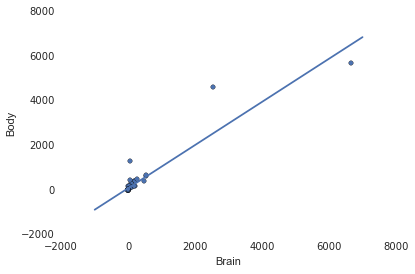

In [212]:
regress = linear_model.LinearRegression()#Fit to put data in, predict to calculate
regress.fit(df2.Brain.reshape(-1, 1), df2.Body)
fn2 = lambda x: regress.predict(x)[0]
df.plot(kind='scatter', x='Brain', y='Body')
plt.plot(xs, [fn2(x) for x in xs])

In [215]:
rII = regress.score(df2.Brain.reshape(-1,1),df2.Body)
print("The RII is {}".format(rII))

The RII is 0.8726620843043331


## Salary Discrimination

The file `salary.txt` contains data for 52 tenure-track professors at a small Midwestern college. This data was used in legal proceedings in the 1980s about discrimination against women in salary.

The data in the file, by column:

1. Sex. 1 for female, 0 for male.
2. Rank. 1 for assistant professor, 2 for associate professor, 3 for full professor.
3. Year. Number of years in current rank.
4. Degree. Highest degree. 1 for doctorate, 0 for master's.
5. YSdeg. Years since highest degree was earned.
6. Salary. Salary/year in dollars.

### Tasks

1. Find the linear regression equation for this data using columns 1-5 to column 6.
2. Find the selection of columns with the best $R^2$ score.
3. Report whether sex is a factor in salary.

In [226]:
df = pd.read_fwf("salary.txt", header=None, 
                 names=["Sex", "Rank", "Year", "Degree", "YSdeg", "Salary"])

In [234]:
df.loc[1:5]

,Sex,Rank,Year,Degree,YSdeg,Salary
1,0,3,13,1,22,35350
2,0,3,10,1,23,28200
3,1,3,7,1,27,26775
4,0,3,19,0,30,33696
5,0,3,16,1,21,28516
